## Output has been removed from this notebook to reduce file sizes in the repo

In [27]:
%load_ext autoreload
%autoreload 2
import scipy
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas.io.osm as osm
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download OpenStreetMap convenience stores for San Francisco proper

In [2]:
conven_gdf = osm.query_osm('node', 
                    bbox=[-122.8662,37.1373,-121.4798,38.2158],
                    tags={'shop'})
print len(conven_gdf)

4999


In [3]:
conven_gdf = conven_gdf[conven_gdf.type == 'Point'].to_crs(epsg=3740)
print conven_gdf.geometry.head(3)
print len(conven_gdf)

0    POINT (607683.9874735761 4170994.887864951)
1    POINT (565752.7343505139 4188941.861329588)
2    POINT (554293.6980625431 4161008.098416461)
Name: geometry, dtype: object
4999


In [4]:
x, y = zip(*[(p.x, p.y) for (i, p) 
             in conven_gdf.geometry.iteritems()])
x = pd.Series(x)
y = pd.Series(y)
print x.head()

0    607683.987474
1    565752.734351
2    554293.698063
3    586226.708290
4    588061.974164
dtype: float64


## Get OpenStreetMap networks for Bay Area that I had previously - someday soon we'll have direct OSM import

In [5]:
store = pd.HDFStore('data/osm_bayarea.h5', "r")
nodes = store.nodes
edges = store.edges
print len(nodes)

226060


## Initialize and preprocess the network

In [6]:
net=pdna.Network(nodes.x, 
                       nodes.y, 
                       edges["from"], 
                       edges.to, 
                       edges[["weight"]])
net.precompute(3000)

## Nearest *point-of-interest* queries

In [7]:
net.init_pois(num_categories=1, max_dist=3000, max_pois=50)

In [8]:
net.set_pois("shops", x, y)

In [9]:
node_ids = net.get_node_ids(x, y)

In [10]:
net.set(node_ids)

In [23]:
agg = pd.DataFrame(net.nearest_pois(3000, "shops", num_pois=1))
# Most values equal maximum since network is entire bay area

Num    1172.426636
dtype: float32

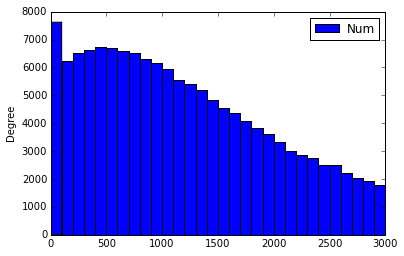

In [26]:
# from scipy.stats import expon

agg.columns = ['Num']
agg = agg[agg.Num  < 3000]
sort = agg.sort(columns='Num', axis=0)
# agg['node'] = [i for i in range(len(agg))]

sort.plot(kind = 'hist', bins=30)
sort.mean()

#probs = agg.divide(float(sum(agg.Num)))
# a, b = expon.fit(agg)
    
# print a
# print b
# counts.hist()

In [36]:
lin = np.polyfit(x, y, 1)
print lin

[-1.33763354 -0.66235128]
